In [29]:
# Load some important tools;

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

In [58]:
df = pd.read_csv('wineReview_clean_output.csv')


In [31]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [59]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Joe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Joe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

In [61]:
normalized = np.vectorize(normalize_document)

df['norm_description'] = normalized(df.description)

In [110]:
df.norm_description


0         aromas include tropical fruit broom brimstone ...
1         ripe fruity wine smooth still structured firm ...
2         tart snappy flavors lime flesh rind dominate g...
3         pineapple rind lemon pith orange blossom start...
4         much like regular bottling comes across rather...
                                ...                        
129966    notes honeysuckle cantaloupe sweeten delicious...
129967    citation given much decade bottle age prior re...
129968    welldrained gravel soil gives wine crisp dry c...
129969    dry style pinot gris crisp acidity also weight...
129970    big rich offdry powered intense spiciness roun...
Name: norm_description, Length: 129971, dtype: object

### TF-IDF Model

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [111]:
tv = TfidfVectorizer(min_df=0.04, max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(df.norm_description)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
#df = df.merge(pd.DataFrame(np.round(tv_matrix, 2), columns=vocab))

In [112]:
df_idf = pd.DataFrame(tv_matrix)

In [114]:
df_idf.columns = vocab
df_idf

,acidity,age,along,alongside,also,apple,aromas,balance,balanced,berry,...,texture,theres,toast,touch,vanilla,well,white,wine,wood,years
0,0.199266,0.000000,0.0,0.356516,0.000000,0.290025,0.187501,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
1,0.209674,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.28813,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.154539,0.0,0.000000
2,0.295099,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.217501,0.0,0.000000
3,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.294845,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
4,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.210305,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,0.294382,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
129967,0.000000,0.635872,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
129968,0.000000,0.365795,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.302913,0.0,0.338016
129969,0.185314,0.329878,0.0,0.000000,0.321268,0.269718,0.000000,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.136585,0.0,0.000000


In [118]:
df_measure = pd.merge(df, df_idf, left_index=True, right_index=True)
df_measure

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,...,texture,theres,toast,touch,vanilla,well,white,wine,wood,years
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.154539,0.0,0.000000
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.217501,0.0,0.000000
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.210305,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.302913,0.0,0.338016
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.136585,0.0,0.000000


In [288]:
# lets create some bins for the ratings and Pricing for these entries

df_measure['rating_bin'] = pd.cut(x=df_measure['points'], bins=[80,83,88,93,100], labels=['0','1','2','3'])
#pricing bins (min is $4, mean is $35, std = $41, 1Q = $17 2Q = $25, 3Q = $42)
df_measure['price_bin'] = pd.cut(x=df_measure['price'], bins=[4,17,25,42,76,117,3300], labels = ['0','1','2','3','4','5'])
df_measure

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,...,touch,vanilla,well,white,wine,wood,years,cluster,rating_bin,price_bin
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,3,1,NaN
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,...,0.0,0.0,0.0,0.0,0.154539,0.0,0.000000,1,1,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,...,0.0,0.0,0.0,0.0,0.217501,0.0,0.000000,8,1,0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,8,1,0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,...,0.0,0.0,0.0,0.0,0.210305,0.0,0.000000,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,3,2,2
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,5,2,3
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,...,0.0,0.0,0.0,0.0,0.302913,0.0,0.338016,1,2,2
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,...,0.0,0.0,0.0,0.0,0.136585,0.0,0.000000,1,2,2


In [297]:
df_trim = df_measure.drop(['Unnamed: 0','country','designation','province','region_1','region_2','taster_name','taster_twitter_handle','title','winery','norm_description'], axis=1)

In [298]:
top100_reviews = df_trim['variety'].value_counts().loc[lambda x : x>100]
top100_reviews
top10_reviews = df_trim['variety'].value_counts().loc[lambda x: x>3000]


In [306]:
top10_reviews

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
Riesling                     5189
Sauvignon Blanc              4967
Syrah                        4142
Rosé                         3564
Merlot                       3102
Name: variety, dtype: int64

In [300]:
df_top100_list = df_trim[df_trim.variety.isin(top100_reviews.index)]
df_top100_list
df_top10_list = df_trim[df_trim.variety.isin(top10_reviews.index)]
df_top10_list

,description,points,price,variety,acidity,age,along,alongside,also,apple,...,touch,vanilla,well,white,wine,wood,years,cluster,rating_bin,price_bin
3,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,8,1,0
4,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.00000,0.0,0.0,0.210305,0.0,0.000000,0,1,3
10,"Soft, supple plum envelopes an oaky structure ...",87,19.0,Cabernet Sauvignon,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.00000,0.0,0.0,0.171266,0.0,0.000000,2,1,1
12,"Slightly reduced, this wine offers a chalky, t...",87,34.0,Cabernet Sauvignon,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.00000,0.0,0.0,0.180877,0.0,0.000000,5,1,2
14,Building on 150 years and six generations of w...,87,12.0,Chardonnay,0.000000,0.000000,0.0,0.0,0.0,0.315832,...,0.0,0.00000,0.0,0.0,0.159937,0.0,0.356943,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129958,This blend of Cabernet Sauvignon-Merlot and Ca...,90,35.0,Bordeaux-style Red Blend,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.31695,0.0,0.0,0.000000,0.0,0.000000,2,2,2
129960,"Fresh and fruity, this is full of red cherry f...",90,48.0,Pinot Noir,0.229641,0.408784,0.0,0.0,0.0,0.000000,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.377741,6,2,3
129963,"A bouquet of black cherry, tart cranberry and ...",90,20.0,Cabernet Sauvignon,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.236195,5,2,1
129966,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Riesling,0.294382,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,3,2,2


In [301]:
df_top100_list.shape

(122213, 104)

In [316]:
#df_top100_list = pd.get_dummies(df_top100_list, columns=['variety'])

#  DON"T DO THIS.

variety_top100 = df_top100_list['variety'].unique()

In [293]:
df_top100_list.dropna(axis=0, inplace = True)
df_top10_list.dropna(axis=0, inplace = True)

O:\Users\Joe\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
O:\Users\Joe\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [302]:
df_top100_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122213 entries, 0 to 129970
Columns: 104 entries, description to price_bin
dtypes: category(2), float64(98), int32(1), int64(1), object(2)
memory usage: 95.8+ MB


In [303]:
df_top100_list.to_csv('wineReview_top100.csv')
df_top10_list.to_csv('wineReview_top10.csv')


In [304]:
df_top100_list

,description,points,price,variety,acidity,age,along,alongside,also,apple,...,touch,vanilla,well,white,wine,wood,years,cluster,rating_bin,price_bin
0,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,0.199266,0.000000,0.0,0.356516,0.000000,0.290025,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,3,1,NaN
1,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,0.209674,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.154539,0.0,0.000000,1,1,0
2,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,0.295099,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.217501,0.0,0.000000,8,1,0
3,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,8,1,0
4,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.210305,0.0,0.000000,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Riesling,0.294382,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,3,2,2
129967,Citation is given as much as a decade of bottl...,90,75.0,Pinot Noir,0.000000,0.635872,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,5,2,3
129968,Well-drained gravel soil gives this wine its c...,90,30.0,Gewürztraminer,0.000000,0.365795,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.302913,0.0,0.338016,1,2,2
129969,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Pinot Gris,0.185314,0.329878,0.0,0.000000,0.321268,0.269718,...,0.0,0.0,0.0,0.0,0.136585,0.0,0.000000,1,2,2


## Correlations

In [212]:
from scipy.stats import pearsonr
import statsmodels.api as sm
import seaborn as sns



pearson correlation: (0.4049433557335129, 0.0)
                                 OLS Regression Results                                
Dep. Variable:                 points   R-squared (uncentered):                   0.422
Model:                            OLS   Adj. R-squared (uncentered):              0.422
Method:                 Least Squares   F-statistic:                          4.918e+04
Date:                Mon, 16 Nov 2020   Prob (F-statistic):                        0.00
Time:                        13:12:00   Log-Likelihood:                     -3.7845e+05
No. Observations:               67234   AIC:                                  7.569e+05
Df Residuals:                   67233   BIC:                                  7.569e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0

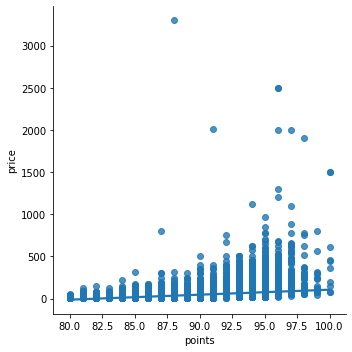

In [197]:
## top 10 review correlation

print("pearson correlation:", pearsonr(df_top10_list.price, df_top10_list.points))
print(sm.OLS(df_top10_list.points, df_top10_list.price).fit().summary())
sns.lmplot(y='price', x='points', data = df_top10_list)

pearson correlation: (0.41607945094106136, 0.0)
                                 OLS Regression Results                                
Dep. Variable:                 points   R-squared (uncentered):                   0.440
Model:                            OLS   Adj. R-squared (uncentered):              0.440
Method:                 Least Squares   F-statistic:                          8.920e+04
Date:                Sat, 14 Nov 2020   Prob (F-statistic):                        0.00
Time:                        16:56:14   Log-Likelihood:                     -6.3849e+05
No. Observations:              113762   AIC:                                  1.277e+06
Df Residuals:                  113761   BIC:                                  1.277e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      

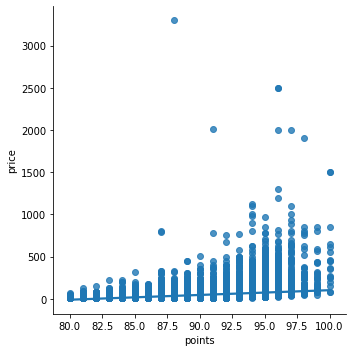

In [147]:

print("pearson correlation:", pearsonr(df_top100_list.price, df_top100_list.points))
print(sm.OLS(df_top100_list.points, df_top100_list.price).fit().summary())
sns.lmplot(y='price', x='points', data = df_top100_list)

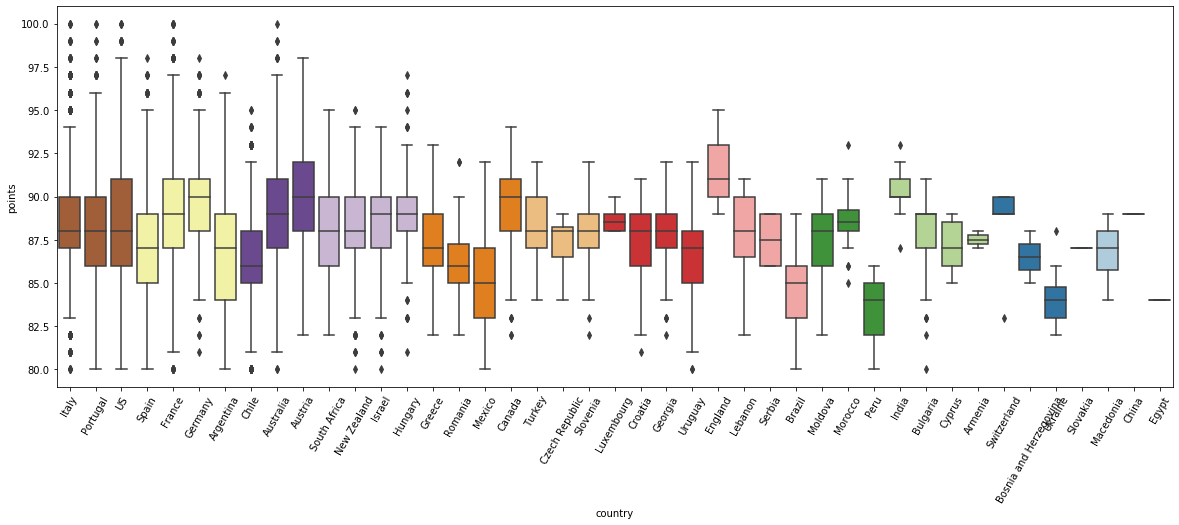

In [279]:
fig, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='country',y='points', data=df_measure, ax = ax, palette="Paired_r")
plt.xticks(rotation = 60)
plt.show()

### Group by variety - Top 100 Varieties

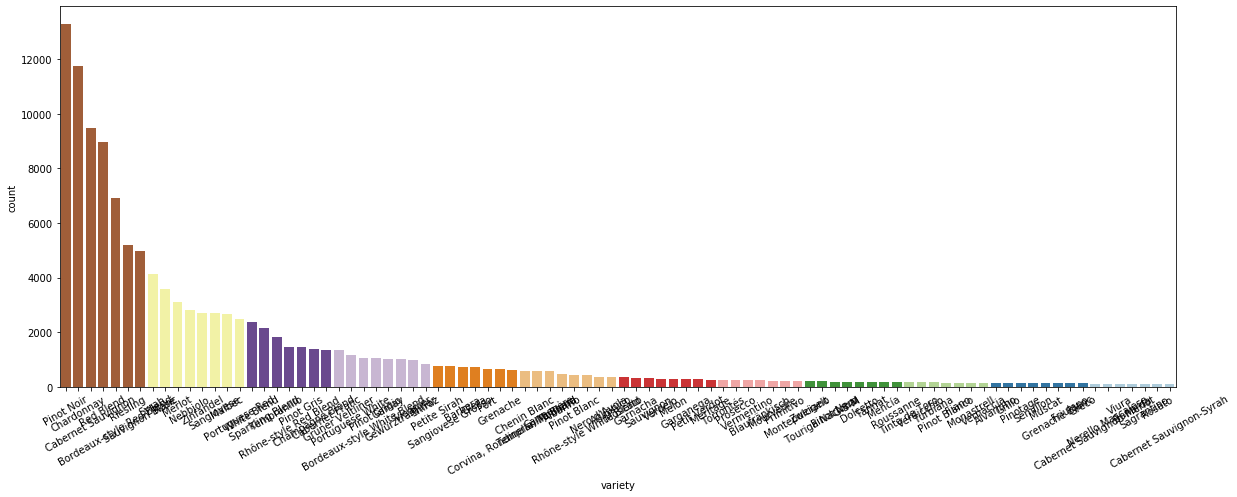

In [276]:
data = df_top100_list.groupby('variety').filter(lambda x: len(x) >100)
list = df_top100_list.variety.value_counts().index.tolist()
fig4, ax4 = plt.subplots(figsize = (20,7))
sns.countplot(x='variety', data=df_top100_list, order = list, ax=ax4, palette="Paired_r")
plt.xticks(rotation = 30)
plt.show()

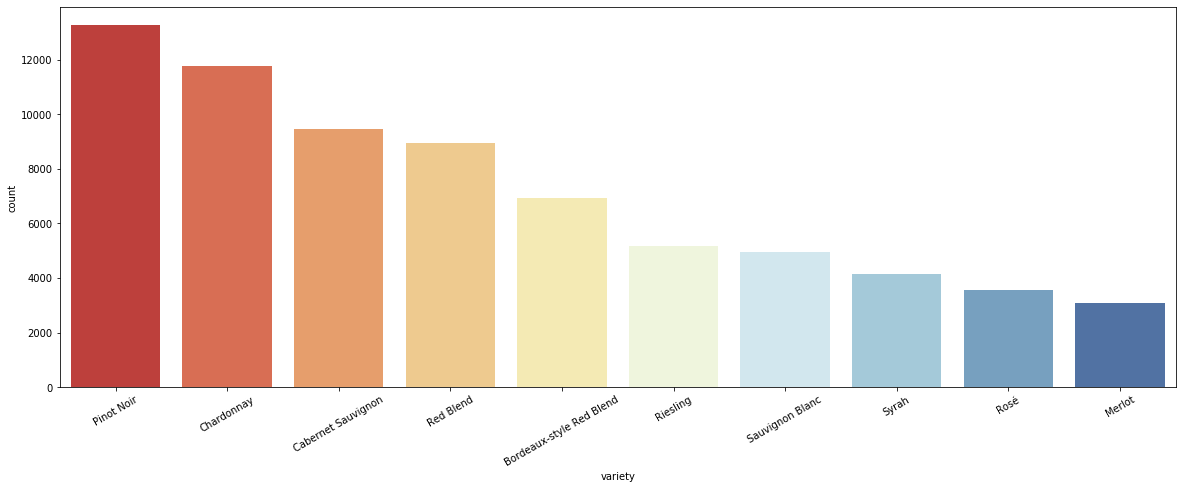

In [275]:
# TOP 10 REVIEW
data = df_top10_list.groupby('variety').filter(lambda x: len(x) >100)
list = df_top10_list.variety.value_counts().index.tolist()
fig4, ax4 = plt.subplots(figsize = (20,7))
sns.countplot(x='variety', data=df_top10_list, order = list, ax=ax4, palette="RdYlBu")
plt.xticks(rotation = 30)
plt.show()

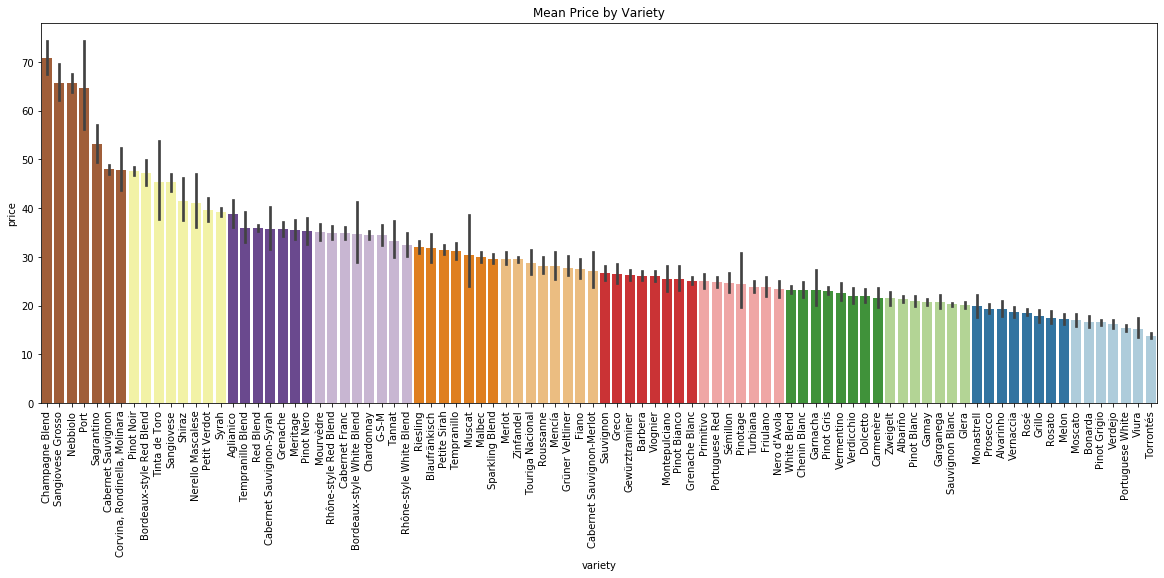

In [281]:
df6 = pd.DataFrame({col:vals['price'] for col,vals in df_top100_list.groupby('variety')})
mean2 = df6.mean()
mean2.sort_values(ascending=False, inplace=True)

fig3, ax3 = plt.subplots(figsize = (20,7))
chart = sns.barplot(x='variety',y='price', data=df_top100_list, order=mean2.index, ax = ax3, palette="Paired_r")
plt.xticks(rotation = 90)
plt.title("Mean Price by Variety")
plt.show()

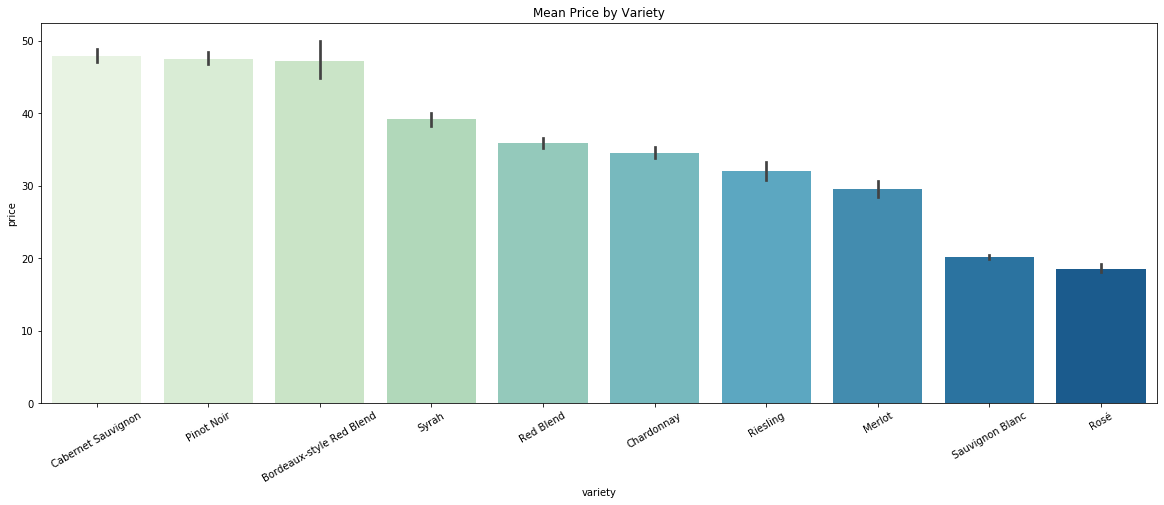

In [273]:
df_10 = pd.DataFrame({col:vals['price'] for col,vals in df_top10_list.groupby('variety')})
mean2 = df_10.mean()
mean2.sort_values(ascending=False, inplace=True)

fig3, ax3 = plt.subplots(figsize = (20,7))
chart = sns.barplot(x='variety',y='price', data=df_top10_list, order=mean2.index, ax = ax3, palette="GnBu")
plt.xticks(rotation = 30)
plt.title("Mean Price by Variety")
plt.show()

In [207]:
#KMeans
from sklearn.cluster import KMeans


In [261]:
#variety_df = df_top10_list

df_top10_list.shape

(71322, 102)

In [264]:
desc = df_top10_list.description.values

In [265]:
vectorize = TfidfVectorizer(stop_words = stop_words, max_features = 1000)
X = vectorize.fit_transform(desc)
words = vectorize.get_feature_names()

In [266]:
kmeans = KMeans(n_clusters = 10, n_init = 5, n_jobs = -1)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=5, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [267]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : wine, tannins, fruits, wood, ripe, drink, fruit, firm, aging, structure
1 : bodied, full, medium, wine, flavors, fruit, finish, texture, cherry, aromas
2 : blackberry, flavors, dry, tannins, oak, wine, blackberries, years, rich, cabernet
3 : lemon, apple, lime, palate, finish, citrus, flavors, peach, riesling, nose
4 : black, cherry, palate, aromas, pepper, tannins, plum, nose, spice, offers
5 : chardonnay, pineapple, flavors, oak, tropical, vanilla, buttered, toast, acidity, fruit
6 : cabernet, sauvignon, merlot, blend, franc, verdot, petit, malbec, black, syrah
7 : pinot, noir, cherry, cola, flavors, silky, raspberry, cherries, dry, acidity
8 : wine, acidity, drink, crisp, fruity, fruits, ready, attractive, ripe, red
9 : fruit, flavors, finish, wine, aromas, cherry, berry, palate, red, plum


In [268]:
variety_df['cluster'] = kmeans.labels_

O:\Users\Joe\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


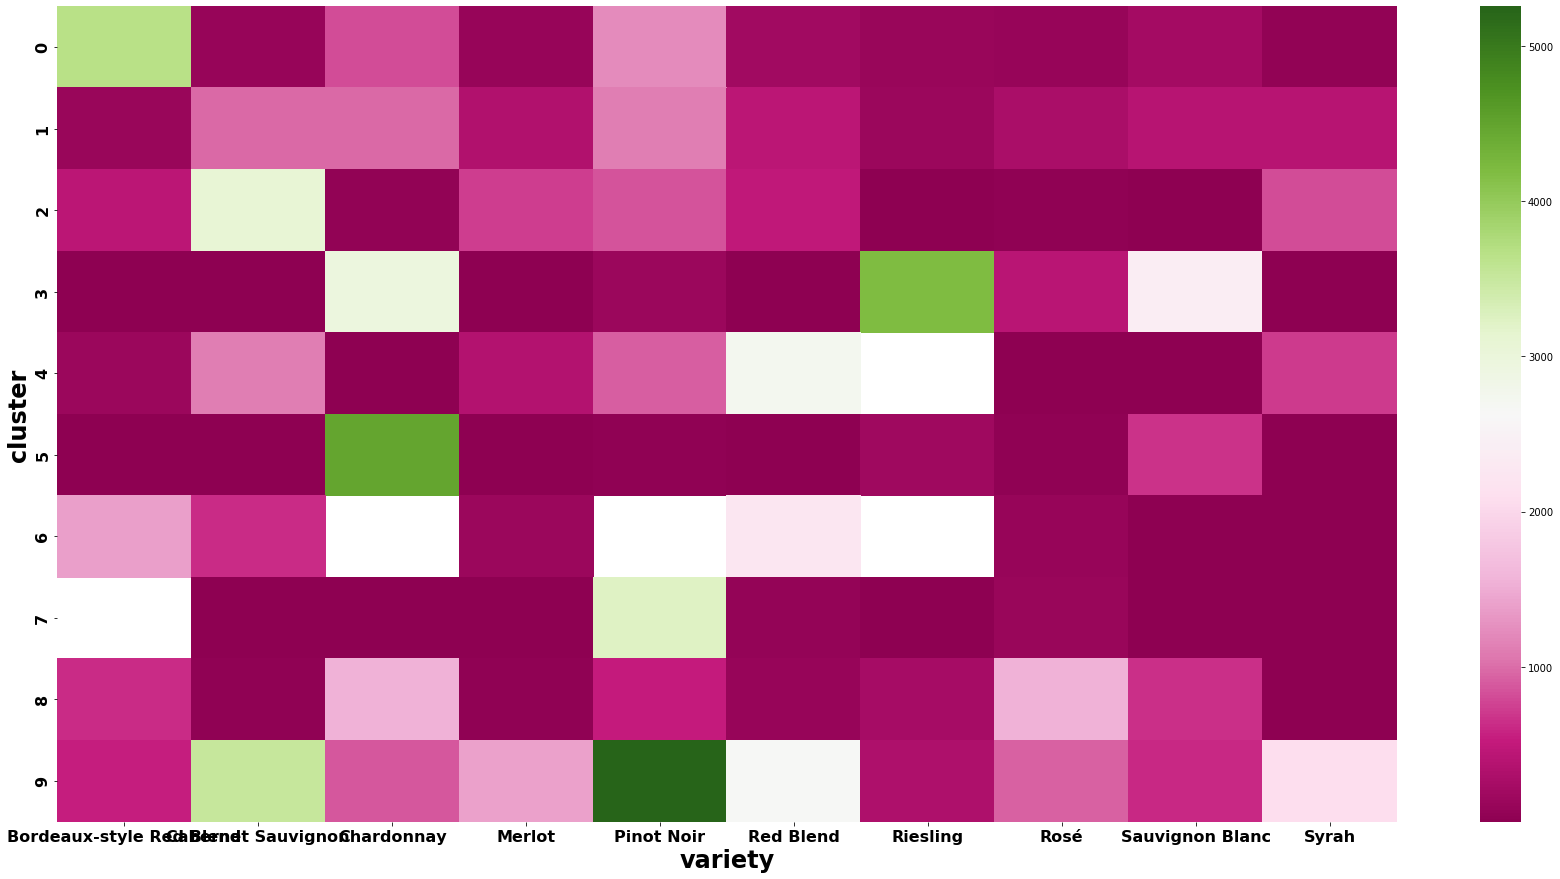

In [270]:
clusters = variety_df.groupby(['cluster', 'variety']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'variety'), ax = ax2, cmap = 'PiYG')

ax2.set_xlabel('variety', fontdict = {'weight': 'bold', 'size': 24})
ax2.set_ylabel('cluster', fontdict = {'weight': 'bold', 'size': 24})
for label in ax2.get_xticklabels():
    label.set_size(16)
    label.set_weight("bold")
for label in ax2.get_yticklabels():
    label.set_size(16)
    label.set_weight("bold")

The HEAT MAP shows some significant clustering to particular wine varieties.  So, there is hope that utilizing the reviews we can make predictions on variety of wines, but as suspected, we might want to reduce the number of varieties instead of all 707 varieties.

### Review - Cluster the top100 (really 90)

In [307]:
desc100 = df_top100_list.description.values

In [308]:
vectorize = TfidfVectorizer(stop_words = stop_words, max_features = 1000)
X = vectorize.fit_transform(desc100)
words = vectorize.get_feature_names()

In [310]:
kmeans = KMeans(n_clusters = 90, n_init = 5, n_jobs = -1)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=90, n_init=5, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [311]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : tones, wine, fruit, spice, cherry, bright, mineral, shows, offers, sweet
1 : sweetness, wine, fruit, flavors, touch, acidity, honey, peach, finish, ripe
2 : wood, aging, wine, fruit, drink, fruits, ripe, rich, character, tannins
3 : still, young, wine, drink, fruits, acidity, tannins, ripe, 2017, fruit
4 : noir, pinot, cherry, silky, flavors, cola, raspberry, dry, cherries, drink
5 : tart, cherry, fruit, cranberry, flavors, wine, finish, light, red, aromas
6 : black, cherry, plum, palate, fruit, tannins, flavors, aromas, pepper, wine
7 : herb, aromas, fruit, followed, flavors, dried, spice, lead, cherry, blue
8 : buttered, toast, chardonnay, pineapple, vanilla, flavors, oak, acidity, jam, sweet
9 : french, new, oak, aged, months, fruit, wine, 100, flavors, barrel
10 : oak, fruit, wine, vanilla, flavors, finish, cherry, aromas, palate, toasty
11 : pinot, chardonnay, noir, grigio, blend, made, sparkling, wine, gris, apple
12 : well, wine, fruits, drink, ripe, tannins, acidity, struct

In [323]:
df_top100_list['cluster2'] = kmeans.labels_


O:\Users\Joe\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [327]:
df_top100_list

,description,points,price,variety,acidity,age,along,alongside,also,apple,...,vanilla,well,white,wine,wood,years,cluster,rating_bin,price_bin,cluster2
0,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,0.199266,0.000000,0.0,0.356516,0.000000,0.290025,...,0.0,0.0,0.0,0.000000,0.0,0.000000,3,1,NaN,89
1,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,0.209674,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.154539,0.0,0.000000,1,1,0,85
2,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,0.295099,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.217501,0.0,0.000000,8,1,0,77
3,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,8,1,0,67
4,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.210305,0.0,0.000000,0,1,3,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Riesling,0.294382,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,3,2,2,57
129967,Citation is given as much as a decade of bottl...,90,75.0,Pinot Noir,0.000000,0.635872,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,5,2,3,64
129968,Well-drained gravel soil gives this wine its c...,90,30.0,Gewürztraminer,0.000000,0.365795,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.302913,0.0,0.338016,1,2,2,12
129969,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Pinot Gris,0.185314,0.329878,0.0,0.000000,0.321268,0.269718,...,0.0,0.0,0.0,0.136585,0.0,0.000000,1,2,2,3


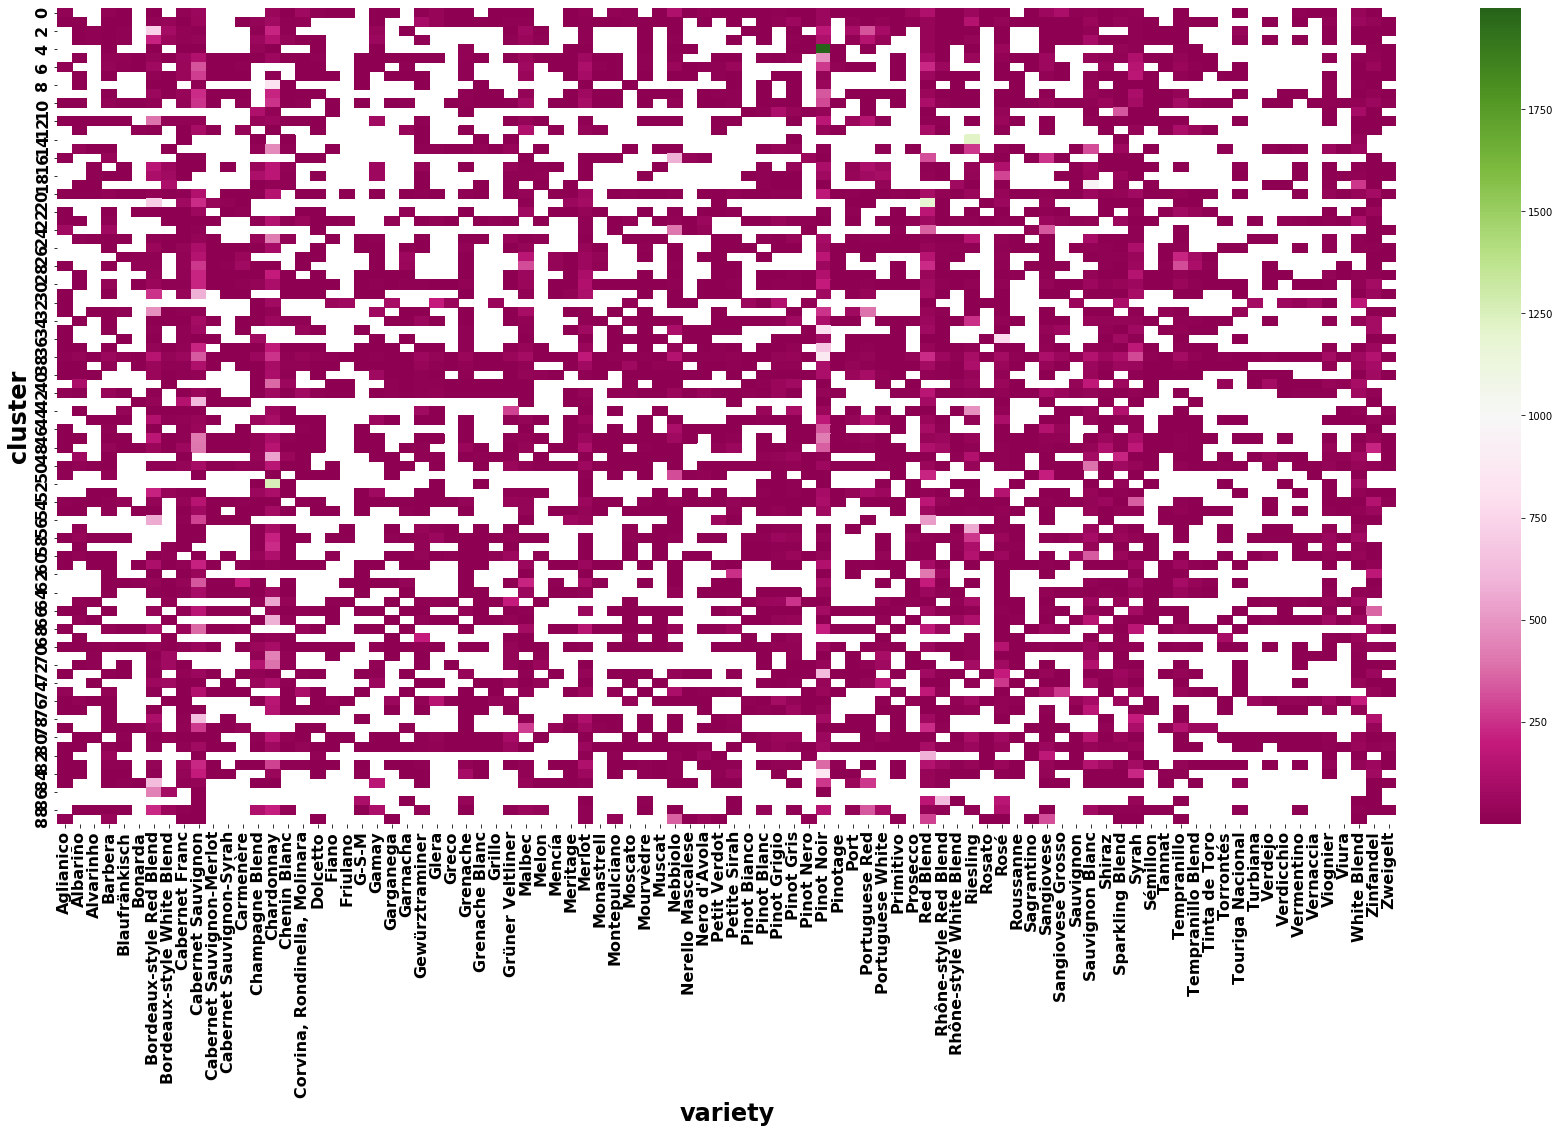

In [328]:
clusters = df_top100_list.groupby(['cluster2', 'variety']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'variety'), ax = ax2, cmap = 'PiYG')

ax2.set_xlabel('variety', fontdict = {'weight': 'bold', 'size': 24})
ax2.set_ylabel('cluster', fontdict = {'weight': 'bold', 'size': 24})
for label in ax2.get_xticklabels():
    label.set_size(16)
    label.set_weight("bold")
for label in ax2.get_yticklabels():
    label.set_size(16)
    label.set_weight("bold")